# 🍔 Food Delivery Data Analysis Project

## 📌 Objective
To integrate data from multiple sources (CSV, JSON, SQL) and extract actionable business insights related to revenue trends, customer behavior, city performance, cuisine popularity, and membership impact.

In [1]:
import pandas as pd
import json
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# 📂 Data Loading

This section loads datasets from CSV, JSON, and SQL sources.

In [6]:
orders = pd.read_csv('data/raw/orders.csv')
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [10]:
users = pd.read_json('data/raw/users.json')
users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [12]:
users.info()
users.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3000 non-null   int64 
 1   name        3000 non-null   object
 2   city        3000 non-null   object
 3   membership  3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


user_id       0
name          0
city          0
membership    0
dtype: int64

In [14]:
import sqlite3

conn = sqlite3.connect("restaurants.db")

In [18]:
with open('data/raw/restaurants.sql', 'r', encoding='utf-8') as file:
    sql_script = file.read()

In [20]:
conn.executescript(sql_script)

In [22]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,restaurants


In [24]:
restaurants = pd.read_sql_query("SELECT * FROM restaurants;", conn)
restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [26]:
restaurants.info()
restaurants.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_id    500 non-null    int64  
 1   restaurant_name  500 non-null    object 
 2   cuisine          500 non-null    object 
 3   rating           500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Index(['restaurant_id', 'restaurant_name', 'cuisine', 'rating'], dtype='object')

## 🔄 Data Integration & Merging

The datasets were merged using **LEFT JOIN** to ensure that all order records were preserved.

### Join Conditions:
- `orders.user_id` → `users.user_id`
- `orders.restaurant_id` → `restaurants.restaurant_id`

LEFT JOIN ensures:
- Every order is retained
- Missing user or restaurant information does not remove order records

The final dataset represents a unified view of transactions, customers, and restaurant details.

In [28]:
merged_df = orders.merge(users, on='user_id', how='left')
merged_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


In [30]:
merged_df = merged_df.merge(restaurants, on='restaurant_id', how='left')
merged_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [32]:
merged_df.shape
merged_df.isnull().sum()
merged_df.columns


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [34]:
print("Orders shape:", orders.shape)
print("Merged shape:", merged_df.shape)


Orders shape: (10000, 6)
Merged shape: (10000, 12)


In [36]:
merged_df.to_csv('data/processed/final_food_delivery_dataset.csv', index=False)

# 📊 Exploratory Data Analysis (EDA)

The following analysis explores:

- Order trends over time
- Customer behavior patterns
- City-wise revenue distribution
- Cuisine popularity
- Membership impact on spending
- Revenue distribution

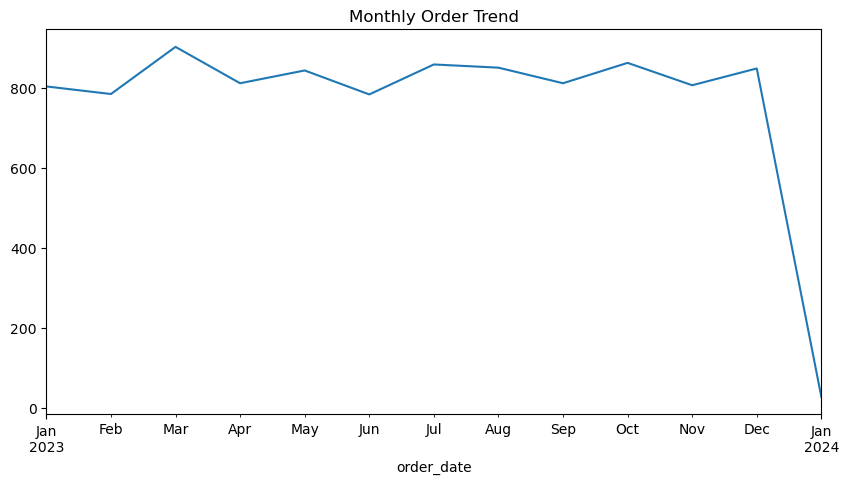

In [40]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

monthly_orders = merged_df.groupby(
    merged_df['order_date'].dt.to_period('M')
).size()

monthly_orders.plot(figsize=(10,5))
plt.title("Monthly Order Trend")
plt.show()

In [42]:
user_orders = merged_df.groupby('user_id').size()
user_orders.describe()

count    2883.000000
mean        3.468609
std         1.792682
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
dtype: float64

In [48]:
city_revenue = merged_df.groupby('city')['total_amount'].sum()
city_revenue.sort_values(ascending=False)

city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64

In [50]:
merged_df = merged_df.drop(columns=['restaurant_name_x'])
merged_df = merged_df.rename(columns={'restaurant_name_y': 'restaurant_name'})


In [52]:
merged_df.columns


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'name', 'city', 'membership', 'restaurant_name', 'cuisine', 'rating'],
      dtype='object')

## 🌆 City-wise Revenue Performance

This analysis determines which cities contribute the highest revenue.

Insights from city performance help in:
- Targeted marketing
- Expansion strategy
- Operational resource allocation

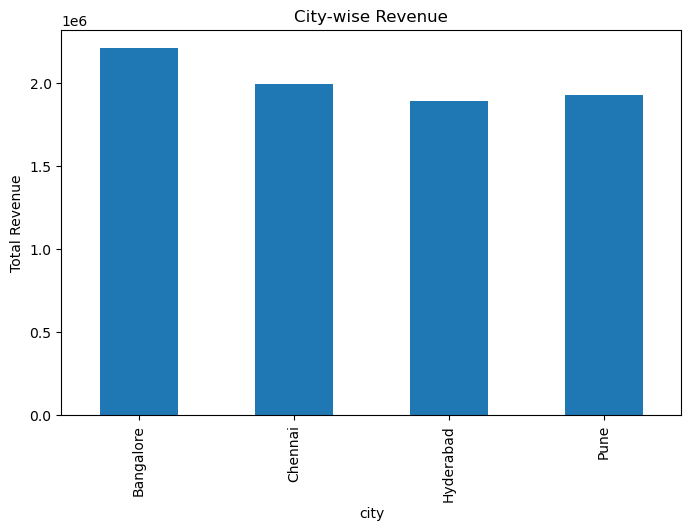

In [54]:
city_revenue.plot(kind='bar', figsize=(8,5))
plt.title("City-wise Revenue")
plt.ylabel("Total Revenue")
plt.show()


In [56]:
top_restaurants = merged_df.groupby('restaurant_name')['total_amount'].sum()
top_restaurants.sort_values(ascending=False).head(5)


restaurant_name
Restaurant_287    29460.47
Restaurant_19     29289.52
Restaurant_484    27051.49
Restaurant_61     26049.71
Restaurant_134    25791.23
Name: total_amount, dtype: float64

## 👑 Membership Impact on Spending

This analysis compares spending patterns between membership types.

Business importance:
- Determines effectiveness of premium membership
- Helps evaluate loyalty program success
- Identifies opportunities for upselling

In [58]:
merged_df.groupby('membership')['total_amount'].mean()

membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64

## 💰 Revenue Distribution Analysis

This visualization shows how order values are distributed across transactions.

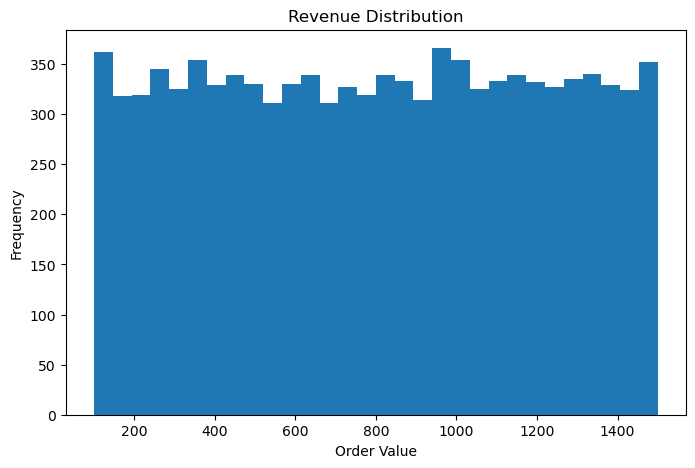

In [72]:
plt.figure(figsize=(8,5))
plt.hist(merged_df['total_amount'], bins=30)
plt.title("Revenue Distribution")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()

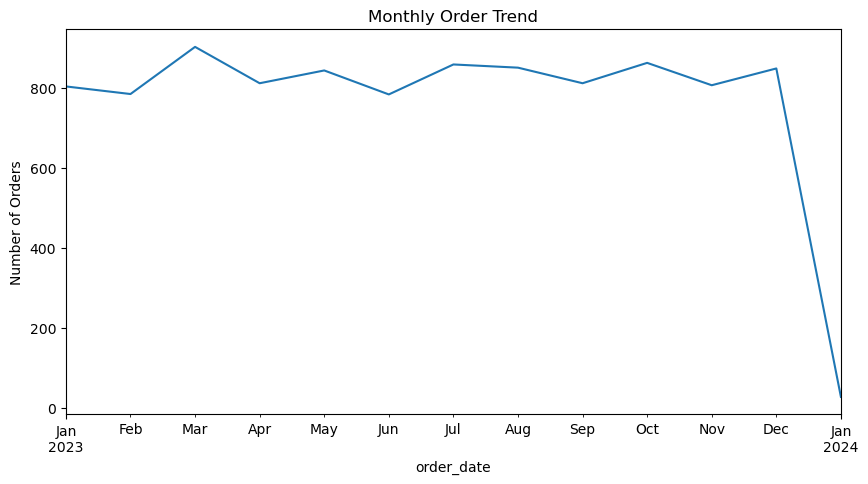

In [60]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

monthly_orders = merged_df.groupby(
    merged_df['order_date'].dt.to_period('M')
).size()

monthly_orders.plot(figsize=(10,5))
plt.title("Monthly Order Trend")
plt.ylabel("Number of Orders")
plt.show()


In [62]:
user_order_counts = merged_df.groupby('user_id').size()

repeat_users = (user_order_counts > 1).sum()
total_users = user_order_counts.count()

repeat_percentage = (repeat_users / total_users) * 100
repeat_percentage


88.06798473812

## 🍜 Cuisine-wise Revenue Analysis

This section identifies the most popular and revenue-generating cuisines.

Cuisine insights help in:
- Menu optimization
- Promotional campaigns
- Restaurant partnerships

In [64]:
cuisine_revenue = merged_df.groupby('cuisine')['total_amount'].sum()
cuisine_revenue.sort_values(ascending=False)


cuisine
Mexican    2085503.09
Italian    2024203.80
Indian     1971412.58
Chinese    1930504.65
Name: total_amount, dtype: float64

In [66]:
city_revenue = merged_df.groupby('city')['total_amount'].sum()
city_revenue.sort_values(ascending=False)


city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64

In [68]:
merged_df.groupby('membership')['total_amount'].mean()

membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64

In [70]:
aov = merged_df['total_amount'].mean()
aov

801.162412